In [2]:
using StaticArrays
using Roadways
using PGFPlots


# Project To Reference Line
There must be no discontinuities

### Line

In [23]:
ref = LineSegment([1.0;1.0],[10.0;1.0])

Roadways.LineSegment([1.0, 1.0], [10.0, 1.0])

In [27]:
function ProjectToReferenceLine(x,y,θ,ref::Roadways.LineSegment,s₀=0.0)
    v2 = [x;y] .- ref.startPt
    v1 = ref.endPt .- ref.startPt
    v1 = v1 / norm(v1)
    s = s₀ + dot(v2,v1)
    t = -cross([v2;0],[v1;0])[end] # negative sign because this is left handed coordinate frame
    ϕ = θ - atan2(v1[2],v1[1])
    return s,t,ϕ
end

ProjectToReferenceLine (generic function with 2 methods)

In [29]:
function plotLine(ref)
    Plots.Linear([ref.startPt[1]; ref.endPt[1]],[ref.startPt[2];ref.endPt[2]])
end

plotLine (generic function with 1 method)

In [26]:
x = 8
y = 4
θ = π/4;

v2 = [x;y] .- ref.startPt
v1 = ref.endPt .- ref.startPt
v1 = v1 / norm(v1)
ds = dot(v2,v1)
dt = -cross([v2;0],[v1;0])[end] # left-handed coordinate frame

3.0

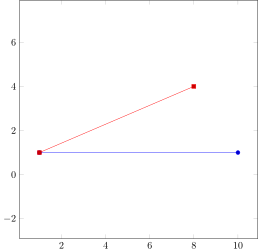

In [30]:
P = [
    plotLine(ref),
    Plots.Linear([ref.startPt[1]; x],[ref.startPt[2];y]),
]
Axis(P, axisEqual=true, width="10cm", height="10cm")

# Arc

In [90]:
x = 5.0
y = -6.0
arc = Arc([0.0;0.0],[10.0;0.0],5.0)

Roadways.Arc([0.0, 0.0], [10.0, 0.0], 5.0)

In [76]:
function ProjectToReferenceLine(x,y,θ,arc::Roadways.Arc,s₀=0.0)
    # compute center of arc
    v_mid = arc.endPt .- arc.startPt
    α_mid = atan2(v_mid[2],v_mid[1]) - sign(arc.radius)*π/2.0
    Δα = asin((norm(v_mid)/2.0)/arc.radius)
    ctr =  arc.startPt .- arc.radius*[cos(α_mid-Δα);sin(α_mid-Δα)]
    
    v1 = arc.startPt .- ctr
    v2 = arc.endPt .- ctr
    α1 = atan2(v1[2],v1[1])
    α2 = atan2(v2[2],v2[1])
    
    v = [x;y] .- ctr
    α = atan2(v[2],v[1])
    
    s = s₀ + arc.radius*(α - α1)
    t = arc.radius - norm(v)
    ϕ = θ - α - sign(arc.radius)*π/2.0
    return s,t,ϕ
end

ProjectToReferenceLine (generic function with 4 methods)

In [73]:
function plotArc(arc)
    v_mid = arc.endPt .- arc.startPt
    α_mid = atan2(v_mid[2],v_mid[1]) - sign(arc.radius)*π/2.0
    Δα = asin((norm(v_mid)/2.0)/arc.radius)
    c = arc.startPt .- arc.radius*[cos(α_mid-Δα);sin(α_mid-Δα)]
    α = linspace(α_mid-Δα,α_mid+Δα)
    x = c[1] + arc.radius*cos.(α)
    y = c[2] + arc.radius*sin.(α)
    Plots.Linear(x,y)
end

plotArc (generic function with 1 method)

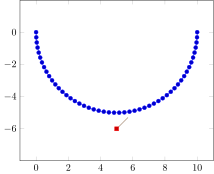

In [92]:
Axis([
        plotArc(arc), 
        Plots.Linear([x],[y]),
        Plots.Linear([x;x+cos(θ)],[y;y+sin(θ)],mark="none")
        ],axisEqual=true)

In [91]:
s,t,ϕ = ProjectToReferenceLine(x,y,θ,arc)

(7.853981633974483, -1.0000000000000009, 0.7853981633974483)

# Spiral

# How much projection is lost by using a sequence of arcs instead of a cubic spline?